In [6]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
import random
import torch
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
from PIL import Image
import pathlib
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import glob
import torchvision
from torchvision import transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.optim as optim

C:\Users\vlaks\AppData\Roaming\Python\Python39\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\vlaks\AppData\Roaming\Python\Python39\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


## Part 1: Analysing the csv file

In [3]:
artist_df = pd.read_csv('artists.csv')
print('The columns in the file are', artist_df.columns.tolist())
print('The dimensions of the artists dataframe are',artist_df.shape)
print('A sample look at the dataframe: ')
artist_df

The columns in the file are ['id', 'name', 'years', 'genre', 'nationality', 'bio', 'wikipedia', 'paintings']
The dimensions of the artists dataframe are (50, 8)
A sample look at the dataframe: 


id                       name        years  \
0    0          Amedeo Modigliani  1884 - 1920   
1    1         Vasiliy Kandinskiy  1866 - 1944   
2    2               Diego Rivera  1886 - 1957   
3    3               Claude Monet  1840 - 1926   
4    4              Rene Magritte  1898 - 1967   
5    5              Salvador Dali  1904 - 1989   
6    6              Edouard Manet  1832 - 1883   
7    7              Andrei Rublev  1360 - 1430   
8    8           Vincent van Gogh  1853 – 1890   
9    9               Gustav Klimt  1862 - 1918   
10  10           Hieronymus Bosch  1450 - 1516   
11  11           Kazimir Malevich  1879 - 1935   
12  12             Mikhail Vrubel  1856 - 1910   
13  13              Pablo Picasso  1881 - 1973   
14  14          Peter Paul Rubens  1577 - 1640   
15  15      Pierre-Auguste Renoir  1841 - 1919   
16  16             Francisco Goya  1746 - 1828   
17  17                Frida Kahlo  1907 - 1954   
18  18                   El Greco  1541 - 1614   
19  19             Albrecht Dürer  1471 - 1528   
20  20              Alfred Sisley  1839 - 1899   
21  21             Pieter Bruegel  1525 - 1569   
22  22               Marc Chagall  1887 - 1985   
23  23          Giotto di Bondone  1266 - 1337   
24  24          Sandro Botticelli  1445 - 1510   
25  25                 Caravaggio  1571 - 1610   
26  26          Leonardo da Vinci  1452 - 1519   
27  27            Diego Velazquez  1599 - 1660   
28  28              Henri Matisse  1869 - 1954   
29  29               Jan van Eyck  1395 - 1441   
30  30                Edgar Degas  1834 - 1917   
31  31                  Rembrandt  1606 - 1669   
32  32                     Titian  1488 - 1576   
33  33  Henri de Toulouse-Lautrec  1864 – 1901   
34  34            Gustave Courbet  1819 - 1877   
35  35           Camille Pissarro  1830 - 1903   
36  36             William Turner  1775 - 1851   
37  37               Edvard Munch  1863 - 1944   
38  38               Paul Cezanne  1839 – 1906   
39  39           Eugene Delacroix  1798 – 1863   
40  40             Henri Rousseau  1844 – 1910   
41  41             Georges Seurat  1859 – 1891   
42  42                  Paul Klee  1879 – 1940   
43  43              Piet Mondrian  1872 – 1944   
44  44                  Joan Miro  1893 – 1983   
45  45                Andy Warhol  1928 – 1987   
46  46               Paul Gauguin  1848 – 1903   
47  47                    Raphael  1483 – 1520   
48  48               Michelangelo  1475 – 1564   
49  49            Jackson Pollock  1912 – 1956   

                                      genre               nationality  \
0                             Expressionism                   Italian   
1              Expressionism,Abstractionism                   Russian   
2                   Social Realism,Muralism                   Mexican   
3                             Impressionism                    French   
4                  Surrealism,Impressionism                   Belgian   
5                                Surrealism                   Spanish   
6                     Realism,Impressionism                    French   
7                             Byzantine Art                   Russian   
8                        Post-Impressionism                     Dutch   
9                     Symbolism,Art Nouveau                  Austrian   
10                     Northern Renaissance                     Dutch   
11                              Suprematism                   Russian   
12                                Symbolism                   Russian   
13                                   Cubism                   Spanish   
14                                  Baroque                   Flemish   
15                            Impressionism                    French   
16                              Romanticism                   Spanish   
17                   Primitivism,Surrealism                   Mexican   
18                                Mannerism             Spanish,Gr

In [4]:
artist_df.drop(["id","bio","wikipedia"],axis=1,inplace=True)
print('The dimensions of the artists dataframe are',artist_df.shape)
artist_df.sample(5)

The dimensions of the artists dataframe are (50, 5)


name        years                     genre    nationality  \
49  Jackson Pollock  1912 – 1956    Abstract Expressionism       American   
31        Rembrandt  1606 - 1669                   Baroque          Dutch   
44        Joan Miro  1893 – 1983                Surrealism        Spanish   
18         El Greco  1541 - 1614                 Mannerism  Spanish,Greek   
4     Rene Magritte  1898 - 1967  Surrealism,Impressionism        Belgian   

    paintings  
49         24  
31        262  
44        102  
18         87  
4         194

In [5]:
print('The number of artists in the file are',artist_df['name'].nunique())
print('The total number of paintings are', artist_df['paintings'].sum())

The number of artists in the file are 50
The total number of paintings are 8446


In [6]:
artist_df.rename(columns={'name':'Name',
                          'years':'Years',
                          'genre':'Genre',
                          'nationality':'Nationality',
                          'paintings':'Num_paintings',}, inplace=True)

In [14]:
max_paintings = artist_df['Num_paintings'].max()
min_paintings = artist_df['Num_paintings'].min()
max_artist_name = artist_df.loc[artist_df['Num_paintings'] == max_paintings, 'Name'].values[0]
min_artist_name = artist_df.loc[artist_df['Num_paintings'] == min_paintings, 'Name'].values[0]
print('The artist with the highest number of paintings is', max_artist_name , 'with' , max_paintings , 'paintings')
print('The artist with the least number of paintings is', min_artist_name, 'with', min_paintings,  'paintings')

The artist with the highest number of paintings is Vincent van Gogh with 877 paintings
The artist with the least number of paintings is Jackson Pollock with 24 paintings


In [10]:
artist_df_temp = pd.DataFrame(artist_df.Nationality.str.split(',').tolist(), index=artist_df.Name).stack().reset_index(level=1, drop=True).reset_index(name='Nationality')
artist_df_nationality = pd.merge(artist_df[['Name','Num_paintings']], artist_df_temp, on ='Name', how='left')
artist_df_nationality

Name  Num_paintings Nationality
0           Amedeo Modigliani            193     Italian
1          Vasiliy Kandinskiy             88     Russian
2                Diego Rivera             70     Mexican
3                Claude Monet             73      French
4               Rene Magritte            194     Belgian
5               Salvador Dali            139     Spanish
6               Edouard Manet             90      French
7               Andrei Rublev             99     Russian
8            Vincent van Gogh            877       Dutch
9                Gustav Klimt            117    Austrian
10           Hieronymus Bosch            137       Dutch
11           Kazimir Malevich            126     Russian
12             Mikhail Vrubel            171     Russian
13              Pablo Picasso            439     Spanish
14          Peter Paul Rubens            141     Flemish
15      Pierre-Auguste Renoir            336      French
16             Francisco Goya            291     Spanish
17                Frida Kahlo            120     Mexican
18                   El Greco             87     Spanish
19                   El Greco             87       Greek
20             Albrecht Dürer            328      German
21              Alfred Sisley            259      French
22              Alfred Sisley            259     British
23             Pieter Bruegel            134     Flemish
24               Marc Chagall            239      French
25               Marc Chagall            239      Jewish
26               Marc Chagall            239  Belarusian
27          Giotto di Bondone            119     Italian
28          Sandro Botticelli            164     Italian
29                 Caravaggio             55     Italian
30          Leonardo da Vinci            143     Italian
31            Diego Velazquez            128     Spanish
32              Henri Matisse            186      French
33               Jan van Eyck             81     Flemish
34                Edgar Degas            702      French
35                  Rembrandt            262       Dutch
36                     Titian            255     Italian
37  Henri de Toulouse-Lautrec             81      French
38            Gustave Courbet             59      French
39           Camille Pissarro             91      French
40             William Turner             66     British
41               Edvard Munch             67   Norwegian
42               Paul Cezanne             47      French
43           Eugene Delacroix             31      French
44             Henri Rousseau             70      French
45             Georges Seurat             43      French
46                  Paul Klee            188      German
47                  Paul Klee            188       Swiss
48              Piet Mondrian             84       Dutch
49                  Joan Miro            102     Spanish
50                Andy Warhol            181    American
51               Paul Gauguin            311      French
52                    Raphael            109     Italian
53               Michelangelo             49     Italian
54            Jackson Pollock             24    American

In [11]:
artist_df_temp = pd.DataFrame(artist_df.Genre.str.split(',').tolist(), index=artist_df.Name).stack().reset_index(level=1, drop=True).reset_index(name='Genre')
artist_df_genre = pd.merge(artist_df[['Name','Num_paintings']], artist_df_temp, on ='Name', how='left')
artist_df_genre

Name  Num_paintings                   Genre
0    Amedeo Modigliani            193           Expressionism
1   Vasiliy Kandinskiy             88           Expressionism
2   Vasiliy Kandinskiy             88          Abstractionism
3         Diego Rivera             70          Social Realism
4         Diego Rivera             70                Muralism
..                 ...            ...                     ...
58        Paul Gauguin            311               Symbolism
59        Paul Gauguin            311      Post-Impressionism
60             Raphael            109        High Renaissance
61        Michelangelo             49        High Renaissance
62     Jackson Pollock             24  Abstract Expressionism

[63 rows x 3 columns]

In [12]:
print('The number of unique genres in the file are ',artist_df_genre['Genre'].nunique())
print('The number of unique nationalities in the file are ',artist_df_nationality['Nationality'].nunique())

The number of unique genres in the file are  24
The number of unique nationalities in the file are  17


In [13]:
artist_df_year = pd.DataFrame(artist_df.Years.str.split(' ',2).tolist(),columns = ['Birth','-','Death'])
artist_df_year.drop(["-"],axis=1,inplace=True)
artist_df["Birth"]=artist_df_year.Birth
artist_df["Death"]=artist_df_year.Death
artist_df.drop(["Years"],axis=1,inplace=True)
artist_df.sample(5)

Name                       Genre Nationality  \
17                Frida Kahlo      Primitivism,Surrealism     Mexican   
27            Diego Velazquez                     Baroque     Spanish   
32                     Titian  High Renaissance,Mannerism     Italian   
48               Michelangelo            High Renaissance     Italian   
33  Henri de Toulouse-Lautrec          Post-Impressionism      French   

    Num_paintings Birth Death  
17            120  1907  1954  
27            128  1599  1660  
32            255  1488  1576  
48             49  1475  1564  
33             81  1864  1901

In [14]:
def calculate_age(row):
    return int(row['Death']) - int(row['Birth'])

In [15]:
artist_df['Age'] = artist_df.apply(lambda row: calculate_age(row), axis=1)

In [16]:
artist_df.sample(5)

Name                  Genre Nationality  Num_paintings Birth  \
3        Claude Monet          Impressionism      French             73  1840   
41     Georges Seurat     Post-Impressionism      French             43  1859   
8    Vincent van Gogh     Post-Impressionism       Dutch            877  1853   
6       Edouard Manet  Realism,Impressionism      French             90  1832   
26  Leonardo da Vinci       High Renaissance     Italian            143  1452   

   Death  Age  
3   1926   86  
41  1891   32  
8   1890   37  
6   1883   51  
26  1519   67

In [17]:
min_age = artist_df['Age'].min()
max_age = artist_df['Age'].max()
print('The minimum age in the file is', min_age)
print('The maximum age in the file is', max_age)

The minimum age in the file is 32
The maximum age in the file is 98


In [18]:
def label_age_group(age):
    if age >= min_age and age <= 40:
        return 'Thirties'
    elif age > 40 and age <= 50:
        return 'Fourties'
    elif age > 50 and age <= 60:
        return 'Fifties'
    elif age > 60 and age <= 70:
        return 'Sixties'
    elif age > 70 and age <= 80:
        return 'Seventies'
    elif age > 80 and age <= 90:
        return 'Eighties'
    elif age > 90 and age <= max_age:
        return 'Ninties'
    else:
        return 'Unknown'

In [19]:
artist_df['Age_Group'] = artist_df.apply(lambda row: label_age_group(row['Age']), axis=1)

In [20]:
artist_df.sample(10)

Name                             Genre Nationality  \
17        Frida Kahlo            Primitivism,Surrealism     Mexican   
23  Giotto di Bondone                 Proto Renaissance     Italian   
3        Claude Monet                     Impressionism      French   
39   Eugene Delacroix                       Romanticism      French   
4       Rene Magritte          Surrealism,Impressionism     Belgian   
19     Albrecht Dürer              Northern Renaissance      German   
14  Peter Paul Rubens                           Baroque     Flemish   
27    Diego Velazquez                           Baroque     Spanish   
7       Andrei Rublev                     Byzantine Art     Russian   
35   Camille Pissarro  Impressionism,Post-Impressionism      French   

    Num_paintings Birth Death  Age  Age_Group  
17            120  1907  1954   47   Fourties  
23            119  1266  1337   71  Seventies  
3              73  1840  1926   86   Eighties  
39             31  1798  1863   65    Sixties  
4             194  1898  1967   69    Sixties  
19            328  1471  1528   57    Fifties  
14            141  1577  1640   63    Sixties  
27            128  1599  1660   61    Sixties  
7              99  1360  1430   70    Sixties  
35             91  1830  1903   73  Seventies

In [ ]:
num_artists_by_age_group = artist_df.groupby('Age_Group').count()['Name']
num_paintings_age_group = artist_df.groupby('Age_Group').sum()['Num_paintings']
#print(num_paintings_age_group)
plt.bar(num_paintings_age_group.index, num_paintings_age_group.values)
plt.title('Number of Artists in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Artists')
plt.show()

In [1]:
corr_age_num_paintings = artist_df['Age'].corr(artist_df['Num_paintings'])
print('The correlation between age of the artist and number of paintings is', corr_age_num_paintings)

NameError: name 'artist_df' is not defined

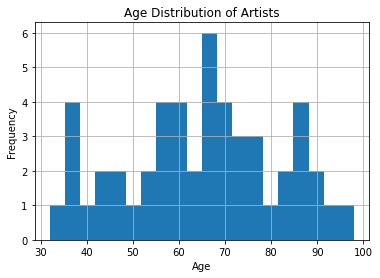

In [526]:
artist_df['Age'].hist(bins=20)
plt.title('Age Distribution of Artists')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [523]:
nationality_max = artist_df.groupby('Nationality')['Num_paintings'].sum().idxmax()
nationality_min = artist_df.groupby('Nationality')['Num_paintings'].sum().idxmin()
genre_max = artist_df.groupby('Genre')['Num_paintings'].sum().idxmax()
genre_min = artist_df.groupby('Genre')['Num_paintings'].sum().idxmin()
print('Nationality with Maximum Number of Paintings:', nationality_max)
print('Nationality with Minimum Number of Paintings:', nationality_min)
print('Genre with Maximum Number of Paintings:', genre_max)
print('Genre with Minimum Number of Paintings:', genre_min)

Nationality with Maximum Number of Paintings: French
Nationality with Minimum Number of Paintings: British
Genre with Maximum Number of Paintings: Impressionism
Genre with Minimum Number of Paintings: Abstract Expressionism


In [524]:
paintings_by_nationality = artist_df_nationality.groupby("Nationality")["Num_paintings"].sum()
print(paintings_by_nationality)

Nationality
American       205
Austrian       117
Belarusian     239
Belgian        194
British        325
Dutch         1360
Flemish        356
French        2618
German         516
Greek           87
Italian       1087
Jewish         239
Mexican        190
Norwegian       67
Russian        484
Spanish       1186
Swiss          188
Name: Num_paintings, dtype: int64


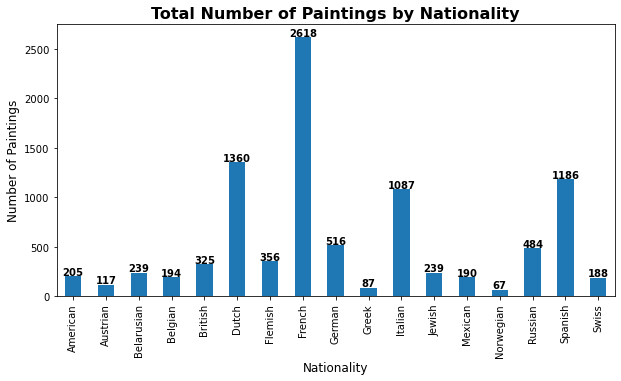

In [448]:
fig, ax = plt.subplots(figsize=(10, 5))
paintings_by_nationality.plot(kind="bar")
plt.title("Total Number of Paintings by Nationality",fontweight='bold', fontsize=16)
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Number of Paintings", fontsize=12)
for i, v in enumerate(paintings_by_nationality.values):
    ax.text(i, v+10, str(v), ha='center', fontweight='bold')
plt.show()

In [449]:
paintings_by_genre = artist_df_genre.groupby("Genre")["Num_paintings"].sum()
print(paintings_by_genre)

Genre
Abstract Expressionism      24
Abstractionism             276
Art Nouveau                117
Baroque                    586
Byzantine Art               99
Cubism                     439
Early Renaissance          164
Expressionism              536
High Renaissance           556
Impressionism             1931
Mannerism                  342
Muralism                    70
Neoplasticism               84
Northern Renaissance       680
Pop Art                    181
Post-Impressionism        1636
Primitivism                429
Proto Renaissance          119
Realism                    149
Romanticism                388
Social Realism              70
Suprematism                126
Surrealism                 743
Symbolism                  666
Name: Num_paintings, dtype: int64


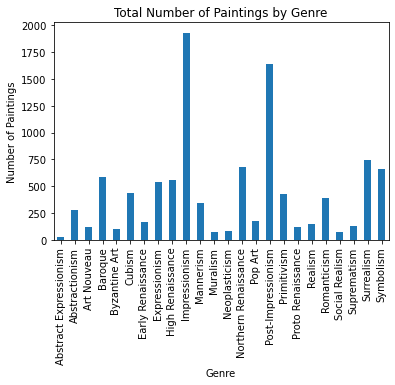

In [450]:
paintings_by_genre.plot(kind="bar")
plt.title("Total Number of Paintings by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Paintings")
plt.show()

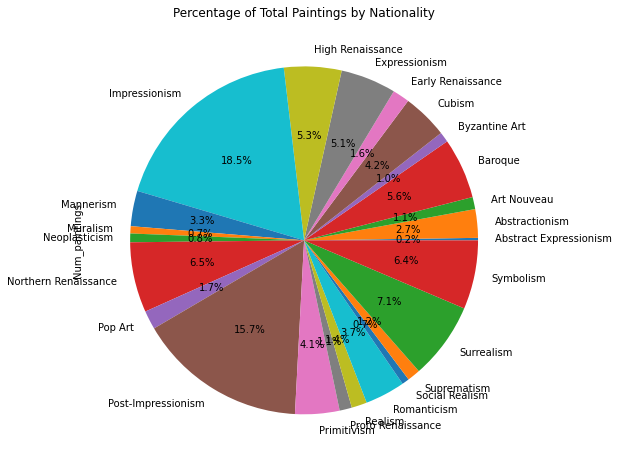

In [527]:
plt.figure(figsize=(8,8))
paintings_by_genre.plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of Total Paintings by Nationality")
plt.show()

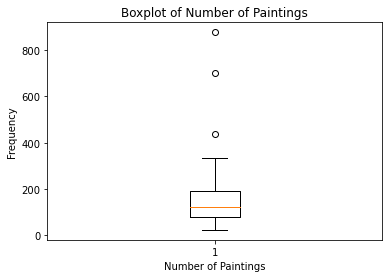

In [452]:
plt.boxplot(artist_df['Num_paintings'])
plt.xlabel('Number of Paintings')
plt.ylabel('Frequency')
plt.title('Boxplot of Number of Paintings')
plt.show()

## Part 2: Image transformations

In [7]:
images_dir = 'C:/Users/vlaks/Desktop/QMUL_sem_2/Neural_Networks_and_Deep_Learning/PredictArtist/images/images'
artist_dirs = os.listdir(images_dir)
artist_name = artist_df['Name'].str.replace(' ', '_').values

n = 8
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(artist_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()

: 

: 

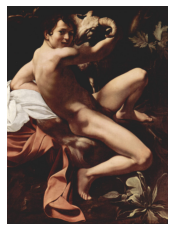

In [454]:
images_dir = 'C:/Users/vlaks/Desktop/QMUL_sem_2/Neural_Networks_and_Deep_Learning/PredictArtist/images/images'
artist_dirs = os.listdir(images_dir)
artist_name = artist_df['Name'].str.replace(' ', '_').values
random_artist = random.choice(artist_name)
random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
random_image_file = os.path.join(images_dir, random_artist, random_image)
image = Image.open(random_image_file)
imgplot = plt.imshow(image)
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

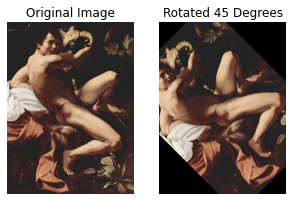

In [455]:
#ROTATE BY 45
rotated_image_45 = TF.rotate(image,45)
fig, axs = plt.subplots(1,2, figsize =(5,5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(rotated_image_45)
axs[1].set_title('Rotated 45 Degrees')
axs[1].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

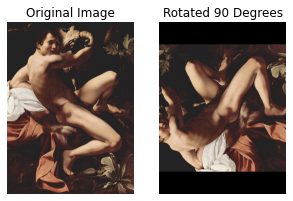

In [456]:
#ROTATE BY 90
rotated_image_90 = TF.rotate(image,90)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(rotated_image_90)
axs[1].set_title('Rotated 90 Degrees')
axs[1].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

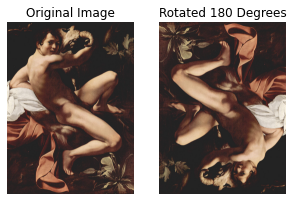

In [457]:
#ROTATE BY 180
rotated_image_180 = TF.rotate(image,180)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(rotated_image_180)
axs[1].set_title('Rotated 180 Degrees')
axs[1].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

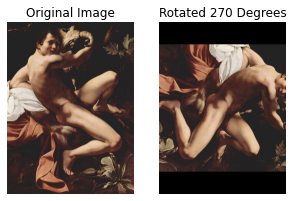

In [458]:
#ROTATE BY 270
rotated_image_270 = TF.rotate(image,270)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(rotated_image_270)
axs[1].set_title('Rotated 270 Degrees')
axs[1].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

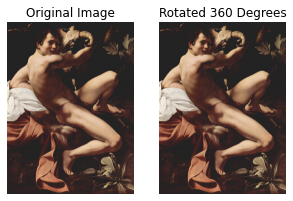

In [459]:
#ROTATE BY 360
rotated_image_360 = TF.rotate(image,360)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(rotated_image_360)
axs[1].set_title('Rotated 360 Degrees')
axs[1].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

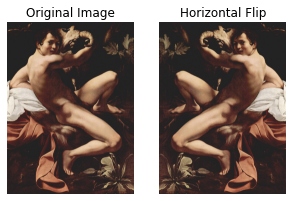

In [460]:
#HORIZONTAL FLIP
horizontal_flip_image = TF.hflip(image)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(horizontal_flip_image)
axs[1].set_title('Horizontal Flip')
axs[1].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

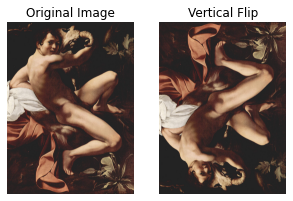

In [461]:
#VERTICAL FLIP
vertical_flip_image = TF.vflip(image)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(vertical_flip_image)
axs[1].set_title('Vertical Flip')
axs[1].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

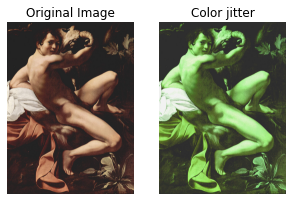

In [462]:
#COLOR_JITTER
color_jitter = transforms.ColorJitter(brightness=0.5, 
                       contrast=0.5, 
                       saturation=0.5, 
                       hue=0.5)(image)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(color_jitter)
axs[1].set_title('Color jitter')
axs[1].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

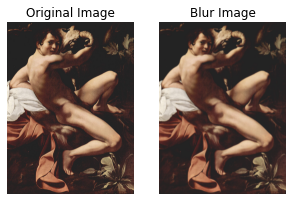

In [463]:
#GAUSSIAN BLUR
blur_image = TF.gaussian_blur(image, kernel_size=29)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(blur_image)
axs[1].set_title('Blur Image')
axs[1].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

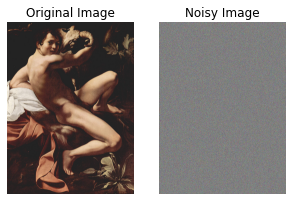

In [464]:
#ADDING NOISE
image_tensor = TF.to_tensor(image)
noise = torch.randn(image_tensor.shape)
noisy_image_tensor = image_tensor + noise
noisy_image = TF.to_pil_image(noisy_image_tensor)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(noisy_image)
axs[1].set_title('Noisy Image')
axs[1].axis('off')
plt.show

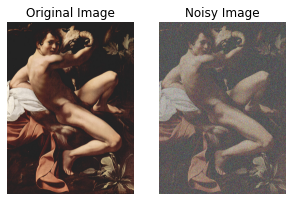

In [465]:
image_tensor = TF.to_tensor(image)
noise = torch.randn(image_tensor.shape)
noisy_image_tensor = image_tensor + 0.8 * noise  # adjust the noise factor as needed
noisy_image_tensor = torch.clamp(noisy_image_tensor, 0, 1)  # keep the pixel values between 0 and 1
noisy_image = TF.to_pil_image(noisy_image_tensor)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(noisy_image)
axs[1].set_title('Noisy Image')
axs[1].axis('off')
plt.show()


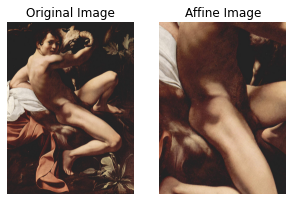

In [466]:
#affine_image = TF.affine(image, angle=angle, translate=translation, scale=scale, shear=shear)
#AFFINE TRANSFORMATION
affine_image = TF.affine(image, angle = 30, translate = (20,20), scale = 2, shear = 0.8)
fig, axs = plt.subplots(1,2, figsize =(5, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(affine_image)
axs[1].set_title('Affine Image')
axs[1].axis('off')
plt.show()

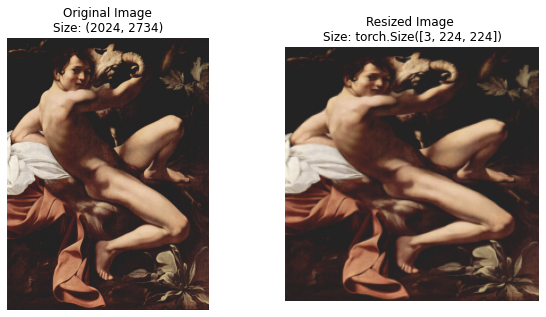

In [467]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

img_transformed = transform(image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image\nSize: {}'.format(image.size))
axs[0].axis('off')
axs[1].imshow(img_transformed.permute(1, 2, 0))
axs[1].set_title('Resized Image \nSize: {}'.format(img_transformed.size()))
axs[1].axis('off')
plt.show()

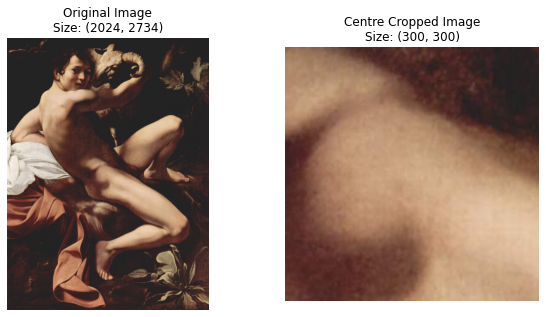

In [468]:
crop_transform = transforms.CenterCrop((300, 300))
cropped_image = crop_transform(image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image\nSize: {}'.format(image.size))
axs[0].axis('off')
axs[1].imshow(cropped_image)
axs[1].set_title('Centre Cropped Image\nSize: {}'.format(cropped_image.size))
axs[1].axis('off')
plt.show()


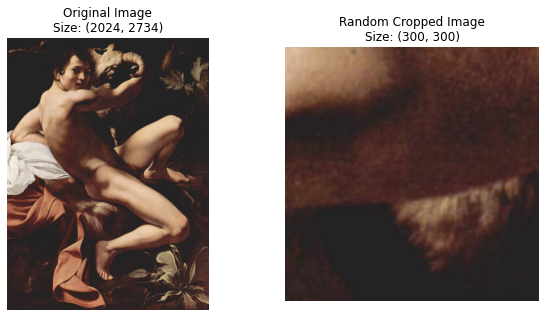

In [469]:
crop_transform = transforms.RandomCrop((300, 300))
cropped_image = crop_transform(image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image\nSize: {}'.format(image.size))
axs[0].axis('off')
axs[1].imshow(cropped_image)
axs[1].set_title('Random Cropped Image\nSize: {}'.format(cropped_image.size))
axs[1].axis('off')
plt.show()

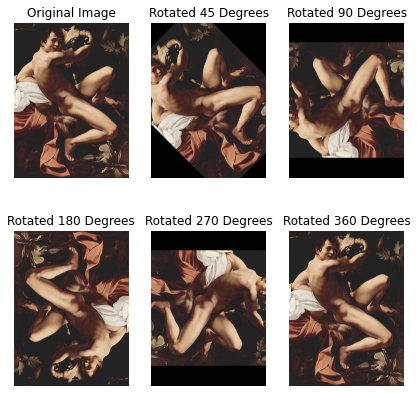

In [470]:
fig, axs = plt.subplots(2, 3, figsize=(7, 7))
axs[0, 0].imshow(image)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
axs[0, 1].imshow(rotated_image_45)
axs[0, 1].set_title('Rotated 45 Degrees')
axs[0, 1].axis('off')
axs[0, 2].imshow(rotated_image_90)
axs[0, 2].set_title('Rotated 90 Degrees')
axs[0, 2].axis('off')
axs[1, 0].imshow(rotated_image_180)
axs[1, 0].set_title('Rotated 180 Degrees')
axs[1, 0].axis('off')
axs[1, 1].imshow(rotated_image_270)
axs[1, 1].set_title('Rotated 270 Degrees')
axs[1, 1].axis('off')
axs[1, 2].imshow(rotated_image_360)
axs[1, 2].set_title('Rotated 360 Degrees')
axs[1, 2].axis('off')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

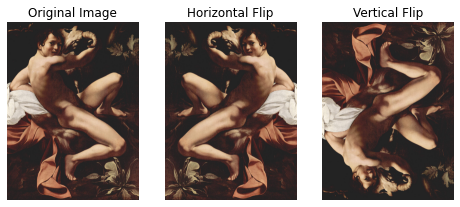

In [471]:
fig, axs = plt.subplots(1,3, figsize =(8, 8))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(horizontal_flip_image)
axs[1].set_title('Horizontal Flip')
axs[1].axis('off')
axs[2].imshow(vertical_flip_image)
axs[2].set_title('Vertical Flip')
axs[2].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

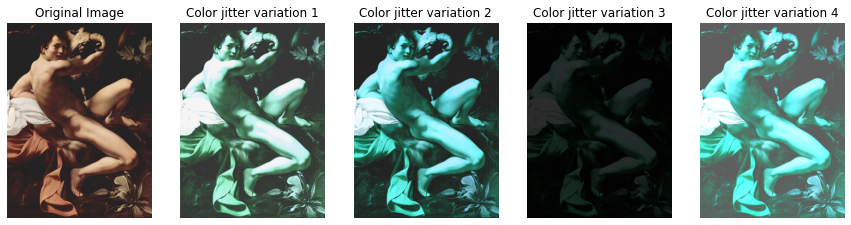

In [568]:
color_jitter_1 = transforms.ColorJitter(brightness=0.5, 
                                        contrast=0.5, 
                                        saturation=0.5, 
                                        hue=0.5)(image)

color_jitter_2 = transforms.ColorJitter(brightness=0.5, 
                                        contrast=1, 
                                        saturation=0.5, 
                                        hue=0.5)(image)

color_jitter_3 = transforms.ColorJitter(brightness=1, 
                                        contrast=0.5, 
                                        saturation=0.5, 
                                        hue=0.5)(image)

color_jitter_4 = transforms.ColorJitter(brightness=1, 
                                        contrast=0.5, 
                                        saturation=1, 
                                        hue=0.5)(image)

fig, axs = plt.subplots(1,5, figsize =(15, 15))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(color_jitter_1)
axs[1].set_title('Color jitter variation 1')
axs[1].axis('off')
axs[2].imshow(color_jitter_2)
axs[2].set_title('Color jitter variation 2')
axs[2].axis('off')
axs[3].imshow(color_jitter_3)
axs[3].set_title('Color jitter variation 3')
axs[3].axis('off')
axs[4].imshow(color_jitter_4)
axs[4].set_title('Color jitter variation 4')
axs[4].axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

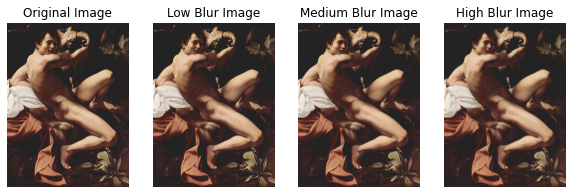

In [473]:
low_blur_image = TF.gaussian_blur(image, kernel_size=9)
medium_blur_image = TF.gaussian_blur(image, kernel_size=19)
high_blur_image = TF.gaussian_blur(image, kernel_size=29)
fig, axs = plt.subplots(1,4, figsize =(10, 10))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(low_blur_image)
axs[1].set_title('Low Blur Image')
axs[1].axis('off')
axs[2].imshow(medium_blur_image)
axs[2].set_title('Medium Blur Image')
axs[2].axis('off')
axs[3].imshow(high_blur_image)
axs[3].set_title('High Blur Image')
axs[3].axis('off')
plt.show

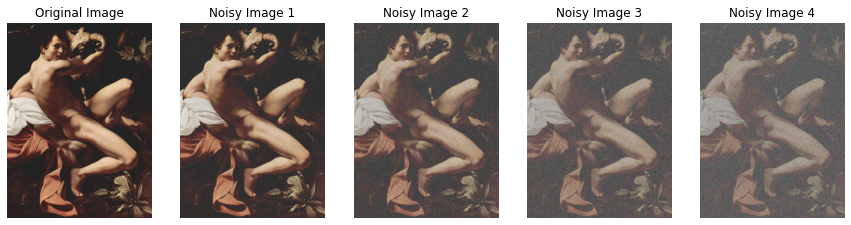

In [474]:
image_tensor = TF.to_tensor(image)
noise = torch.randn(image_tensor.shape)
noisy_image_tensor_1 = image_tensor + 0.25 * noise  
noisy_image_tensor_1 = torch.clamp(noisy_image_tensor_1, 0, 1)  
noisy_image_1 = TF.to_pil_image(noisy_image_tensor_1)
noisy_image_tensor_2 = image_tensor + 0.5 * noise  
noisy_image_tensor_2 = torch.clamp(noisy_image_tensor_2, 0, 1)  
noisy_image_2 = TF.to_pil_image(noisy_image_tensor_2)
noisy_image_tensor_3 = image_tensor + 0.75 * noise  
noisy_image_tensor_3 = torch.clamp(noisy_image_tensor_3, 0, 1)  
noisy_image_3 = TF.to_pil_image(noisy_image_tensor_3)
noisy_image_tensor_4 = image_tensor + 1 * noise  
noisy_image_tensor_4 = torch.clamp(noisy_image_tensor_4, 0, 1)  
noisy_image_4 = TF.to_pil_image(noisy_image_tensor_4)

fig, axs = plt.subplots(1,5, figsize =(15, 15))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(noisy_image_1)
axs[1].set_title('Noisy Image 1')
axs[1].axis('off')
axs[2].imshow(noisy_image_2)
axs[2].set_title('Noisy Image 2')
axs[2].axis('off')
axs[3].imshow(noisy_image_3)
axs[3].set_title('Noisy Image 3')
axs[3].axis('off')
axs[4].imshow(noisy_image_4)
axs[4].set_title('Noisy Image 4')
axs[4].axis('off')
plt.show()

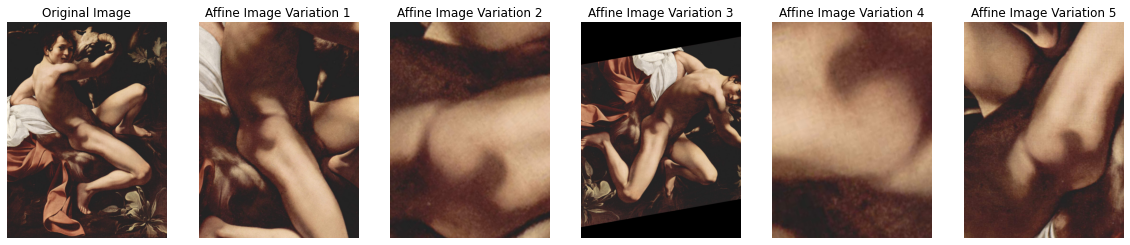

In [475]:
affine_image_1 = TF.affine(image, angle = 30, translate = (20,20), scale = 2, shear = 0.8)
affine_image_2 = TF.affine(image, angle = 320, translate = (20,10), scale = 5, shear = 0.5)
affine_image_3 = TF.affine(image, angle = 80, translate = (20,20), scale = 1, shear = 0)
affine_image_4 = TF.affine(image, angle = 160, translate = (30,50), scale = 7, shear = 1.3)
affine_image_5 = TF.affine(image, angle = 270, translate = (20,40), scale = 3, shear = 2)
fig, axs = plt.subplots(1,6, figsize =(20, 20))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(affine_image_1)
axs[1].set_title('Affine Image Variation 1')
axs[1].axis('off')
axs[2].imshow(affine_image_2)
axs[2].set_title('Affine Image Variation 2')
axs[2].axis('off')
axs[3].imshow(affine_image_3)
axs[3].set_title('Affine Image Variation 3')
axs[3].axis('off')
axs[4].imshow(affine_image_4)
axs[4].set_title('Affine Image Variation 4')
axs[4].axis('off')
axs[5].imshow(affine_image_5)
axs[5].set_title('Affine Image Variation 5')
axs[5].axis('off')
plt.show()

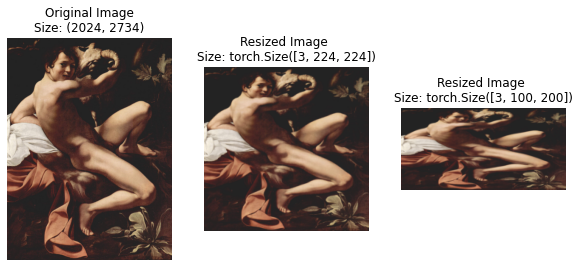

In [476]:
transform_1 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
transform_2 = transforms.Compose([
    transforms.Resize((100, 200)),
    transforms.ToTensor(),
])

img_resized_1 = transform_1(image)
img_resized_2 = transform_2(image)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image\nSize: {}'.format(image.size))
axs[0].axis('off')
axs[1].imshow(img_resized_1.permute(1, 2, 0))
axs[1].set_title('Resized Image \nSize: {}'.format(img_resized_1.size()))
axs[1].axis('off')
axs[2].imshow(img_resized_2.permute(1, 2, 0))
axs[2].set_title('Resized Image \nSize: {}'.format(img_resized_2.size()))
axs[2].axis('off')
plt.show()

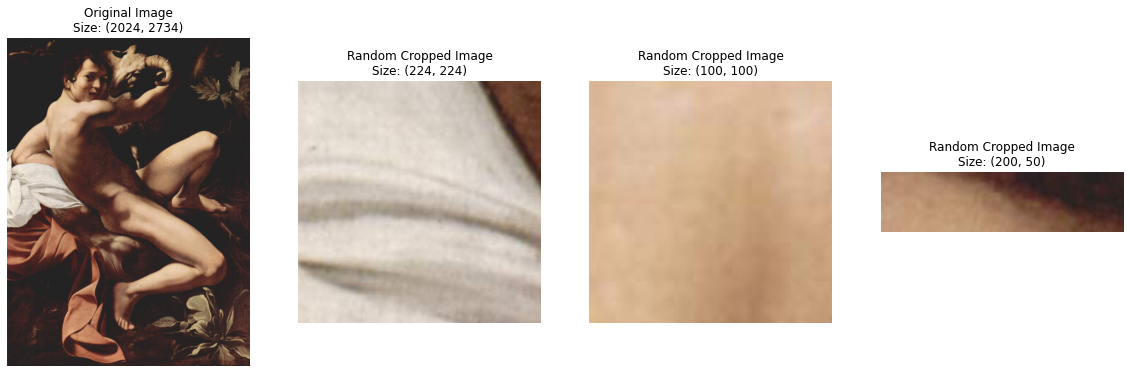

In [477]:
crop_transform_1 = transforms.RandomCrop((224, 224))
cropped_image_1 = crop_transform_1(image)

crop_transform_2 = transforms.RandomCrop((100, 100))
cropped_image_2 = crop_transform_2(image)

crop_transform_3 = transforms.RandomCrop((50, 200))
cropped_image_3 = crop_transform_3(image)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[0].set_title('Original Image\nSize: {}'.format(image.size))
axs[0].axis('off')
axs[1].imshow(cropped_image_1)
axs[1].set_title('Random Cropped Image\nSize: {}'.format(cropped_image_1.size))
axs[1].axis('off')
axs[2].imshow(cropped_image_2)
axs[2].set_title('Random Cropped Image\nSize: {}'.format(cropped_image_2.size))
axs[2].axis('off')
axs[3].imshow(cropped_image_3)
axs[3].set_title('Random Cropped Image\nSize: {}'.format(cropped_image_3.size))
axs[3].axis('off')
plt.show()

## Part 3: CNN Model 1

In [478]:
images_dir = pathlib.Path('C:/Users/vlaks/Desktop/QMUL_sem_2/Neural_Networks_and_Deep_Learning/PredictArtist/images/images')

In [479]:
data_dir = pathlib.Path('C:/Users/vlaks/Desktop/QMUL_sem_2/Neural_Networks_and_Deep_Learning/PredictArtist/images/images')
batch_size = 32
img_height, img_width = 224, 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset='training',
    seed=123, image_size=(img_height, img_width), batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset='validation',
    seed=123, image_size=(img_height, img_width), batch_size=batch_size
)

Found 8774 files belonging to 51 classes.
Using 7020 files for training.
Found 8774 files belonging to 51 classes.
Using 1754 files for validation.


In [483]:
# Set the number of classes and the input shape
num_classes = 51
input_shape = (batch_size, img_height, img_width, 3)

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=(img_height, img_width, 3)))
model.add(layers.experimental.preprocessing.RandomZoom(0.1))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.build(input_shape)


Epoch 1/10
220/220 [==============================] - 538s 2s/step - loss: 3.5618 - accuracy: 0.1131 - val_loss: 3.3472 - val_accuracy: 0.1351
Epoch 2/10
220/220 [==============================] - 521s 2s/step - loss: 3.1872 - accuracy: 0.1746 - val_loss: 3.0487 - val_accuracy: 0.1881
Epoch 3/10
220/220 [==============================] - 565s 3s/step - loss: 2.9225 - accuracy: 0.2214 - val_loss: 2.8733 - val_accuracy: 0.2298
Epoch 4/10
220/220 [==============================] - 893s 4s/step - loss: 2.7525 - accuracy: 0.2605 - val_loss: 2.7733 - val_accuracy: 0.2543
Epoch 5/10
220/220 [==============================] - 504s 2s/step - loss: 2.5927 - accuracy: 0.2970 - val_loss: 2.7819 - val_accuracy: 0.2617
Epoch 6/10
220/220 [==============================] - 534s 2s/step - loss: 2.4050 - accuracy: 0.3330 - val_loss: 2.7489 - val_accuracy: 0.2896
Epoch 7/10
220/220 [==============================] - 533s 2s/step - loss: 2.1968 - accuracy: 0.3809 - val_loss: 2.6703 - val_accuracy: 0.3044

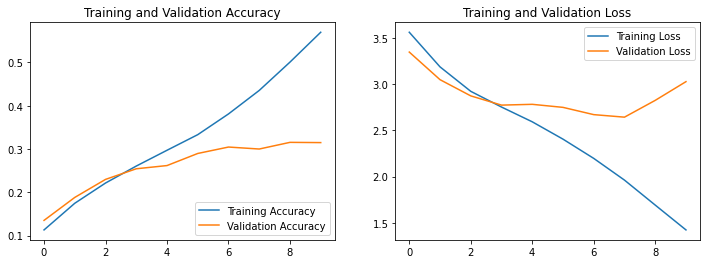

In [484]:

train_acc = []
train_loss = []
val_acc = []
val_loss = []


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

for epoch in range(epochs):
    train_acc.append(history.history['accuracy'][epoch])
    train_loss.append(history.history['loss'][epoch])
    val_acc.append(history.history['val_accuracy'][epoch])
    val_loss.append(history.history['val_loss'][epoch])

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_ds)
print(f'Validation accuracy: {accuracy}')



epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


## Part 3: CNN Model 2

In [554]:
data_dir = 'C:/Users/vlaks/Desktop/QMUL_sem_2/Neural_Networks_and_Deep_Learning/PredictArtist/images/images'
batch_size = 32
img_height, img_width = 224, 224

transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)


train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


In [555]:
print(len(train_loader))
print(len(val_loader))

192
83


In [556]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.pool3(x)
        x = x.view(-1, 128 * 28 * 28)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the CNN model
model = CNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [557]:
def train(model, dataloader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)

    return epoch_loss, epoch_acc

In [558]:
def evaluate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)

    return epoch_loss, epoch_acc


In [560]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(10):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, 10, train_loss, train_acc, val_loss, val_acc))

plt.plot(range(1,11), train_accs, label='Train Acc')
plt.plot(range(1,11), val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


IndexError: Target 44 is out of bounds.

In [564]:
print(len(dataset.classes))

51


## Part 3: CNN model 3

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Set the number of classes and the input shape
num_classes = 51
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

# Create the DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/vlaks/Desktop/QMUL_sem_2/Neural_Networks_and_Deep_Learning/PredictArtist/images/images',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'C:/Users/vlaks/Desktop/QMUL_sem_2/Neural_Networks_and_Deep_Learning/PredictArtist/images/images',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 7042 images belonging to 51 classes.
Found 1732 images belonging to 51 classes.
Epoch 1/10
140/221 [==================>...........] - ETA: 16:32 - loss: 6.7415 - accuracy: 0.0672